In [2]:
# Load Our Dataset
import pandas as pd
from google.colab import files
uploaded=files.upload()
df = pd.read_csv("Housing_Modified.csv")
df.head(3)

Saving Housing_Modified.csv to Housing_Modified (1).csv


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no


In [3]:
# Cleaning , Standardization , Normalization
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)


In [4]:
# One Hot Encoding

df_stories = pd.get_dummies(df['stories'],prefix='stories')
df = pd.concat([df,df_stories],axis=1) # axis = 1 --> columnWise

del df['stories']

df.head(3)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          546 non-null    float64
 1   lotsize        546 non-null    int64  
 2   bedrooms       546 non-null    int64  
 3   bathrms        546 non-null    int64  
 4   driveway       546 non-null    int64  
 5   recroom        546 non-null    int64  
 6   fullbase       546 non-null    int64  
 7   gashw          546 non-null    int64  
 8   airco          546 non-null    int64  
 9   garagepl       546 non-null    int64  
 10  prefarea       546 non-null    int64  
 11  stories_four   546 non-null    uint8  
 12  stories_one    546 non-null    uint8  
 13  stories_three  546 non-null    uint8  
 14  stories_two    546 non-null    uint8  
dtypes: float64(1), int64(10), uint8(4)
memory usage: 49.2 KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


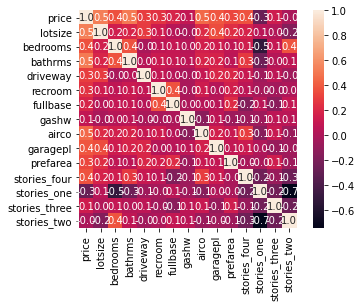

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.heatmap(df.corr(),square=True,annot=True,fmt='.1f')

In [8]:
# VIF 
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four',
       'stories_one', 'stories_three', 'stories_two'],
      dtype='object')

In [9]:
# Create a separate list of Independent_Variables

independent_variables = ['lotsize','bedrooms',
                        'bathrms','driveway',
                        'recroom','fullbase',
                        'gashw','airco',
                        'garagepl','prefarea',
                        'stories_four','stories_one',
                        'stories_three','stories_two']
independent_variables

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [10]:
# Compute MultiCollinearity
# VIF --> Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X = df[independent_variables]
y = df['price']

# VIF value greater than 10 

thresh = 10 # It is an indicator for VIF

for i in np.arange(0,len(independent_variables)):
  vif = [variance_inflation_factor(X[independent_variables].values,ix)
  for ix in range(X[independent_variables].shape[1])]
  
  maxloc = vif.index(max(vif))
  
  if max(vif) > thresh:
    print ("VIF :",vif)
    print ("Dropping : ",X[independent_variables].columns[maxloc],
          "at index",maxloc)
    del independent_variables[maxloc]
    
  else:
    break
    
print ('\nFinal Independent Variables : \n',independent_variables)
    
   
    
  
  
  


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


VIF : [1.3704738112004569, 1.578326825971881, 1.2987779728705593, 1.1648811574651847, 1.2148620093192928, 1.3369114662383517, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 4.544836339845972, 11.781465345739338, 3.943698568447546, 17.220894903652624]
Dropping :  stories_two at index 13
VIF : [9.027672411240845, 12.40877864989557, 9.374682124313615, 6.79426994395169, 1.4753724454932144, 2.055797712632684, 1.103128332756141, 1.785054332017555, 1.9607784997238857, 1.5317205065647905, 1.4546157757803124, 1.8969940907498246, 1.278600527923588]
Dropping :  bedrooms at index 1

Final Independent Variables : 
 ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one', 'stories_three']


In [11]:
independent_variables = ['lotsize', 'bathrms', 'driveway', 'recroom', 
                         'fullbase', 'gashw', 'airco', 'garagepl', 
                         'prefarea', 'stories_four', 'stories_one', 
                         'stories_three']

X = df[independent_variables]
y = df['price']

print (X.shape)
print (y.shape)

(546, 12)
(546,)


In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test= train_test_split(X,y,train_size=.80,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 12)
(110, 12)
(436,)
(110,)


In [13]:
# OLS 
#!pip install -U statsmodels
'''!pip install --upgrade Cython
!pip install --upgrade git+https://github.com/statsmodels/statsmodels
import statsmodels.api as sm'''

  
import statsmodels.api as sm

lm = sm.OLS(y_train,X_train).fit()
print (lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              760.6
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                   5.22e-278
Time:                        22:02:35   Log-Likelihood:                         -4819.9
No. Observations:                 436   AIC:                                      9664.
Df Residuals:                     424   BIC:                                      9713.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [14]:
independent_variables = ['lotsize', 'bathrms', 'driveway', 
                         'fullbase', 'gashw', 'airco', 'garagepl', 
                         'prefarea', 'stories_four', 'stories_one', 
                         'stories_three']

X = df[independent_variables]
y = df['price']

In [15]:
X_train , X_test , y_train , y_test= train_test_split(X,y,train_size=.80,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 11)
(110, 11)
(436,)
(110,)


In [16]:
lm = sm.OLS(y_train,X_train).fit()
print (lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              828.0
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                   4.34e-279
Time:                        22:02:36   Log-Likelihood:                         -4820.8
No. Observations:                 436   AIC:                                      9664.
Df Residuals:                     425   BIC:                                      9708.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [17]:
lotsize = int(input('Enter Lotsize : '))
bathrms = int(input('Enter Bathrooms : '))
driveway = int(input('Enter Driveway : '))
fullbase = int(input('Enter Fullbase : '))
gashw = int(input('Enter Gas Hot Water : '))
airco = int(input('Enter AirCondition : '))
garagepl = int(input('Enter Garage place : '))
prefarea = int(input('Enter Prefarea : '))
stories_four = int(input('Enter Story Four : '))
stories_one = int(input('Enter Story One : '))
stories_three = int(input('Enter Story Three : '))

# convert these input into dictionaries

dict1 = {'lotsize':lotsize,'bathrms':bathrms,'driveway':driveway,
        'fullbase':fullbase,'gashw':gashw,'airco':airco,
        'garagepl':garagepl,'prefarea':prefarea,
        'stories_four':stories_four,'stories_one':stories_one,
        'stories_three':stories_three}

# convert dictionary into dataframe

df_input = pd.DataFrame(dict1,index=[0],columns=['lotsize','bathrms',
                                                'driveway','fullbase',
                                                'gashw','airco',
                                                'garagepl','prefarea',
                                                'stories_four','stories_one',
                                                'stories_three']) 
df_input

Enter Lotsize : 4000
Enter Bathrooms : 1
Enter Driveway : 0
Enter Fullbase : 0
Enter Gas Hot Water : 0
Enter AirCondition : 0
Enter Garage place : 0
Enter Prefarea : 0
Enter Story Four : 1
Enter Story One : 0
Enter Story Three : 0


,lotsize,bathrms,driveway,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three
0,4000,1,0,0,0,0,0,0,1,0,0


In [18]:
predict_price = lm.predict(df_input)
print ('Predicted Price Of House is :  ',predict_price[0])

Predicted Price Of House is :   48790.20999705959


In [19]:
# Accuracy 
y_pred_price = lm.predict(X_train)
y_pred_price

273     69699.608180
40      53062.296687
397     96389.432543
339     46458.295694
411    109603.681749
           ...      
129     89341.317162
144     56317.097682
72      29472.350033
235     40195.546116
37      77827.532744
Length: 436, dtype: float64

In [20]:
from sklearn.metrics import r2_score

print ("Model Accuracy : ",r2_score(y_train,y_pred_price))

Model Accuracy :  0.6669710966728543


In [21]:
_

273     69699.608180
40      53062.296687
397     96389.432543
339     46458.295694
411    109603.681749
           ...      
129     89341.317162
144     56317.097682
72      29472.350033
235     40195.546116
37      77827.532744
Length: 436, dtype: float64